In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
delivery_df = pd.read_csv('/content/drive/MyDrive/task2 (1)/df_cleaned-DL.csv')
pickup_df = pd.read_csv('/content/drive/MyDrive/task2 (1)/merged_df_cleaned.csv')
print(delivery_df.head())
print(pickup_df.head())

   order_id  region_id      city  courier_id        lng       lat  aoi_id  \
0   3158819          1  Shanghai         164  121.52128  31.06614     450   
1    751342          1  Shanghai         164  121.52124  31.06687     450   
2   3380476          1  Shanghai         164  121.52106  31.06731     450   
3   2184571          1  Shanghai         164  121.52128  31.06616     450   
4    941371          1  Shanghai         164  121.52123  31.06614     450   

   aoi_type          accept_time      accept_gps_time  ...  \
0         1  2023-06-04 11:05:00  2023-06-04 11:05:00  ...   
1         1  2023-06-04 11:18:00  2023-06-04 11:18:00  ...   
2         1  2023-06-03 10:13:00  2023-06-03 10:13:00  ...   
3         1  2023-06-04 10:39:00  2023-06-04 10:39:00  ...   
4         1  2023-06-04 11:18:00  2023-06-04 11:18:00  ...   

         delivery_time    delivery_gps_time delivery_gps_lng delivery_gps_lat  \
0  2023-06-04 17:40:00  2023-06-04 17:40:00        121.52407         31.06614   
1 

In [4]:
import pandas as pd

# 1. Vérification et conversion du format datetime
pickup_df['pickup_time'] = pd.to_datetime(pickup_df['pickup_time'], errors='coerce')

# 2. Extraction des features temporelles
pickup_df['pickup_day'] = pickup_df['pickup_time'].dt.day
pickup_df['pickup_hour'] = pickup_df['pickup_time'].dt.hour
pickup_df['pickup_weekday'] = pickup_df['pickup_time'].dt.weekday  # 0=lundi, 6=dimanche
pickup_df['pickup_weekend'] = pickup_df['pickup_weekday'].isin([5, 6]).astype(int)  # 1=weekend, 0=weekday

# 3. Features supplémentaires utiles
pickup_df['pickup_month'] = pickup_df['pickup_time'].dt.month
pickup_df['pickup_dayofyear'] = pickup_df['pickup_time'].dt.dayofyear
pickup_df['pickup_week'] = pickup_df['pickup_time'].dt.isocalendar().week  # Numéro de semaine

# 4. Vérification des résultats
print("Nouvelles colonnes créées :")
print(pickup_df[['pickup_time', 'pickup_day', 'pickup_hour',
                'pickup_weekday', 'pickup_weekend']].head())


Nouvelles colonnes créées :
          pickup_time  pickup_day  pickup_hour  pickup_weekday  pickup_weekend
0 2023-07-08 10:10:00           8           10               5               1
1 2023-07-21 10:10:00          21           10               4               0
2 2023-07-12 17:22:00          12           17               2               0
3 2023-07-09 15:54:00           9           15               6               1
4 2023-07-07 09:53:00           7            9               4               0

Fichier enregistré sous : /content/drive/MyDrive/task2 (1)/pickup_df_with_time_features.csv


 Supprimer les colonnes inutiles ou les coller dans les caractéristiques

In [4]:
# Suppression des colonnes non pertinentes
delivery_df = delivery_df.drop(columns=['order_id','delivery_time',  'courier_id'])
pickup_df = pickup_df.drop(columns=['order_id', 'courier_id'])


#delivery


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le label encoder
label_encoder = LabelEncoder()

# Encoder la colonne 'city'
delivery_df['city_encoded'] = label_encoder.fit_transform(delivery_df['city'])

print(delivery_df[['city', 'city_encoded']].head())


       city  city_encoded
0  Shanghai             3
1  Shanghai             3
2  Shanghai             3
3  Shanghai             3
4  Shanghai             3


Afficher les villes avec leur numéro attribué

In [ ]:

for city, label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"Ville: {city}, Numéro attribué: {label}")


Ville: Chongqing, Numéro attribué: 0
Ville: Hangzhou, Numéro attribué: 1
Ville: Jilin, Numéro attribué: 2
Ville: Shanghai, Numéro attribué: 3
Ville: Yantai, Numéro attribué: 4


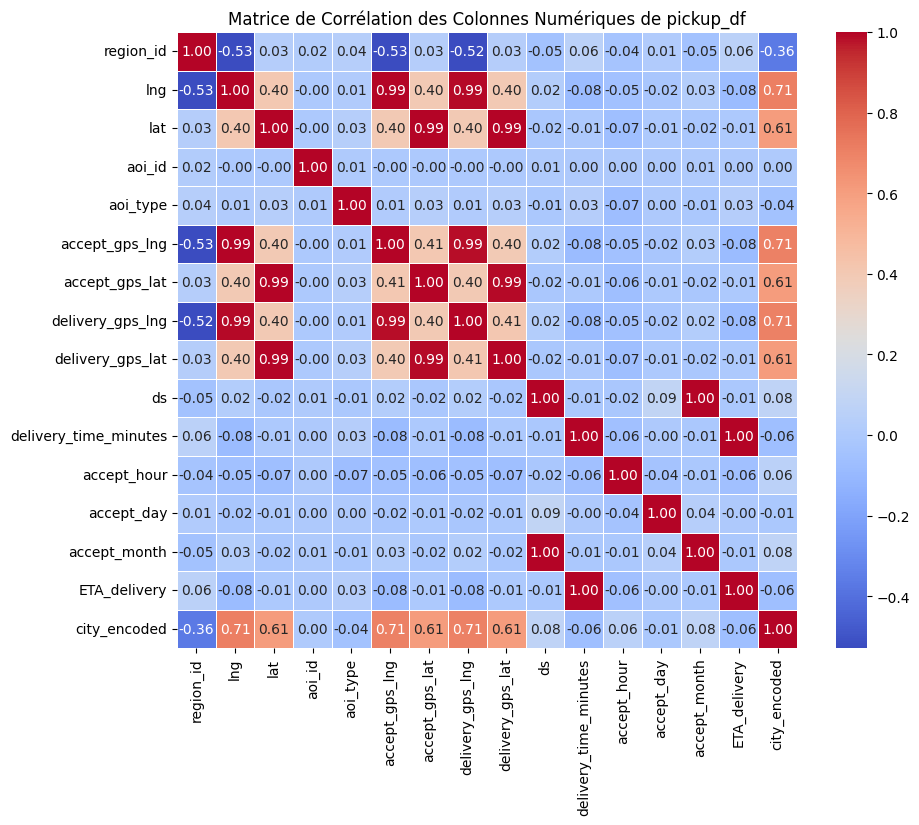

                       region_id       lng       lat    aoi_id  aoi_type  \
region_id               1.000000 -0.528239  0.031512  0.017398  0.038484   
lng                    -0.528239  1.000000  0.403098 -0.003302  0.011453   
lat                     0.031512  0.403098  1.000000 -0.003480  0.033980   
aoi_id                  0.017398 -0.003302 -0.003480  1.000000  0.008728   
aoi_type                0.038484  0.011453  0.033980  0.008728  1.000000   
accept_gps_lng         -0.526151  0.994489  0.398877 -0.003391  0.011221   
accept_gps_lat          0.029881  0.402556  0.994737 -0.003356  0.033534   
delivery_gps_lng       -0.524104  0.992173  0.399922 -0.003289  0.011409   
delivery_gps_lat        0.031292  0.401117  0.994886 -0.003425  0.033811   
ds                     -0.045910  0.023792 -0.018015  0.005327 -0.010713   
delivery_time_minutes   0.056888 -0.082161 -0.006284  0.002563  0.027726   
accept_hour            -0.036068 -0.051380 -0.065408  0.000397 -0.073965   
accept_day  

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Use a heatmap to visualize the correlation structure among all numerical features
numeric_columns = delivery_df.select_dtypes(include=['float64', 'int64']).columns

# Calculer et afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure
sns.heatmap(delivery_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Colonnes Numériques de pickup_df')
plt.show()
corr_matrix = delivery_df[numeric_columns].corr()

# Afficher la matrice de corrélation
print(corr_matrix)


In [ ]:
# Afficher les types de données pour chaque colonne
print(delivery_df.dtypes)


region_id                  int64
city                      object
lng                      float64
lat                      float64
aoi_id                     int64
aoi_type                   int64
accept_time               object
accept_gps_time           object
accept_gps_lng           float64
accept_gps_lat           float64
delivery_time             object
delivery_gps_time         object
delivery_gps_lng         float64
delivery_gps_lat         float64
ds                         int64
delivery_time_minutes    float64
accept_hour                int64
accept_day                 int64
accept_month               int64
ETA_delivery             float64
city_encoded               int64
dtype: object


In [ ]:
# Convertir les colonnes de type 'object' en datetime
delivery_df['accept_time'] = pd.to_datetime(delivery_df['accept_time'], errors='coerce')
delivery_df['delivery_time'] = pd.to_datetime(delivery_df['delivery_time'], errors='coerce')
delivery_df['accept_gps_time'] = pd.to_datetime(delivery_df['accept_gps_time'], errors='coerce')
delivery_df['delivery_gps_time'] = pd.to_datetime(delivery_df['delivery_gps_time'], errors='coerce')
# Convertir les dates en secondes depuis une date de référence (par exemple, Unix epoch)
delivery_df['accept_time_seconds'] = (delivery_df['accept_time'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
delivery_df['delivery_time_seconds'] = (delivery_df['delivery_time'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
delivery_df['accept_gps_time_seconds'] = (delivery_df['accept_gps_time'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
delivery_df['delivery_gps_time_seconds'] = (delivery_df['delivery_gps_time'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

# Vérifier si des valeurs sont devenues NaT (Not a Time) après la conversion
print(delivery_df[['accept_time', 'delivery_time', 'accept_gps_time', 'delivery_gps_time']].isna().sum())


accept_time          0
delivery_time        0
accept_gps_time      0
delivery_gps_time    0
dtype: int64


In [6]:
# Sample a smaller dataset
delivery_sampled = delivery_df.sample(n=5000, random_state=42)

Appliquer le modèle RandomForest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import gc  # Pour le garbage collector
delivery_df = delivery_df.sample(frac=0.3, random_state=42)  # 30% des données
cols_to_keep = ['accept_time', 'delivery_time', 'accept_gps_time', 'delivery_gps_time', 'city', 'ETA_delivery']

# Conversion des dates en datetime (avec gestion des erreurs)
date_cols = ['accept_time', 'delivery_time', 'accept_gps_time', 'delivery_gps_time']
for col in date_cols:
    delivery_sampled[col] = pd.to_datetime(delivery_sampled [col], errors='coerce')

# Conversion des dates en secondes depuis epoch (en int32 pour économiser la RAM)
epoch = pd.Timestamp('1970-01-01')
delivery_sampled['accept_time_seconds'] = ((delivery_sampled['accept_time'] - epoch) // pd.Timedelta('1s')).astype('int32')
delivery_sampled['delivery_time_seconds'] = ((delivery_sampled['delivery_time'] - epoch) // pd.Timedelta('1s')).astype('int32')
delivery_sampled['accept_gps_time_seconds'] = ((delivery_sampled['accept_gps_time'] - epoch) // pd.Timedelta('1s')).astype('int32')
delivery_sampled['delivery_gps_time_seconds'] = ((delivery_sampled['delivery_gps_time'] - epoch) // pd.Timedelta('1s')).astype('int32')

# Encodage de la ville en catégorielle (moins gourmand que object)
delivery_sampled['city'] = delivery_sampled['city'].astype('category')
label_encoder = LabelEncoder()
delivery_sampled['city_encoded'] = label_encoder.fit_transform(delivery_sampled['city']).astype('int8')

# Suppression des colonnes inutiles (libère immédiatement de la RAM)
cols_to_drop = date_cols + ['city']
delivery_sampled.drop(columns=cols_to_drop, inplace=True)

# Vérification mémoire avant le modèle
print(f"Taille du DataFrame en mémoire : {delivery_sampled.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Séparation features/target
X = delivery_sampled.drop(columns=['ETA_delivery'])
y = delivery_sampled['ETA_delivery']

# Libération mémoire explicite
del delivery_sampled
gc.collect()

# Random Forest avec paramètres optimisés pour la RAM
rf = RandomForestClassifier(
    n_estimators=50,  # Au lieu de 100 par défaut
    max_depth=10,     # Limite la profondeur des arbres
    random_state=42,
    n_jobs=-1        # Utilise tous les cœurs disponibles
)

# Entraînement
rf.fit(X, y)

# Feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df)

Taille du DataFrame en mémoire : 0.77 MB
                      feature  importance
12      delivery_time_minutes    0.294496
5                      aoi_id    0.053645
0                    order_id    0.051889
10           delivery_gps_lat    0.049280
2                  courier_id    0.047578
8              accept_gps_lat    0.047166
9            delivery_gps_lng    0.046839
7              accept_gps_lng    0.046290
3                         lng    0.041064
4                         lat    0.040299
13                accept_hour    0.037590
16        accept_time_seconds    0.036389
17      delivery_time_seconds    0.035767
18    accept_gps_time_seconds    0.033852
19  delivery_gps_time_seconds    0.030342
14                 accept_day    0.028639
1                   region_id    0.027742
11                         ds    0.024456
6                    aoi_type    0.014001
15               accept_month    0.008436
20               city_encoded    0.004240


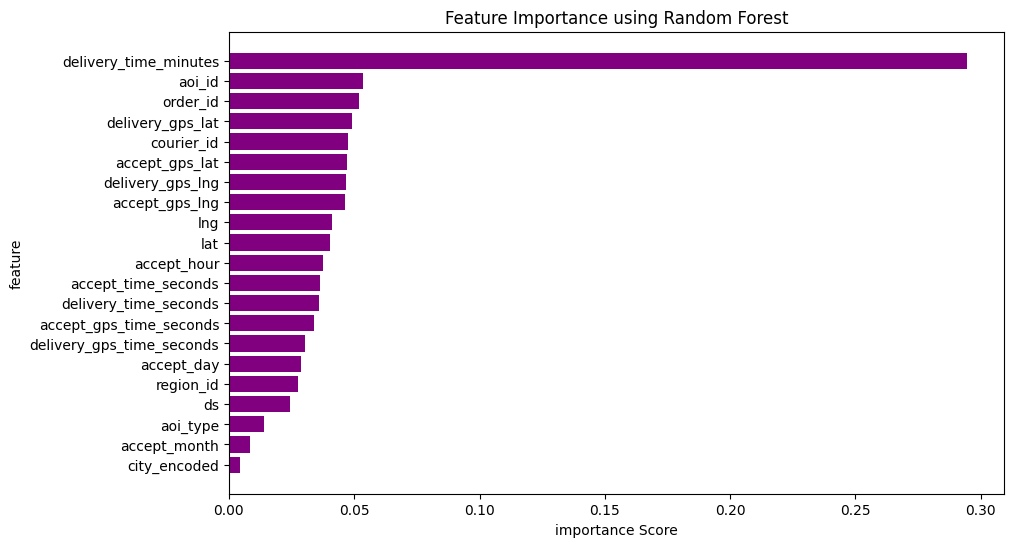

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='purple')
plt.xlabel('importance Score')
plt.ylabel('feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [7]:
# Define features to remove based on importance scores
low_importance_features = ['city', 'accept_month', 'aoi_type']

# Drop the low-importance features
delivery_df=delivery_df.drop(columns=low_importance_features)

**task_duration**

In [39]:
# calcul de la durée de la tâche (task_duration)
delivery_df = delivery_df.sample(frac=0.3, random_state=42)
delivery_df['task_duration'] = pd.to_datetime(delivery_df['delivery_time']) - pd.to_datetime(delivery_df['accept_time'])
# Calculer la distance entre deux points géographiques (simplifié ici)
from geopy.distance import geodesic

def calculate_distance(row):
    start = (row['accept_gps_lat'], row['accept_gps_lng'])
    end = (row['delivery_gps_lat'], row['delivery_gps_lng'])
    return geodesic(start, end).km

delivery_df['distance'] = delivery_df.apply(calculate_distance, axis=1)


nombre total de livraisons par jour

In [ ]:
# Exemple d'agrégation par courrier (nombre total de livraisons par jour)
delivery_df['accept_time'] = pd.to_datetime(delivery_df['accept_time'])
delivery_df['date'] = delivery_df['accept_time'].dt.date

# Nombre de livraisons par jour pour chaque livreur
deliveries_per_day = delivery_df.groupby(['courier_id', 'date']).size().reset_index(name='deliveries_count')

# Afficher le résultat
print(deliveries_per_day)


        courier_id        date  deliveries_count
0                0  2023-07-27                 1
1                1  2023-05-28                 1
2                1  2023-05-29                 2
3                1  2023-05-30                 1
4                1  2023-06-01                 1
...            ...         ...               ...
161345        4876  2023-10-10                 1
161346        4876  2023-10-11                 1
161347        4876  2023-10-12                 2
161348        4876  2023-10-13                 5
161349        4876  2023-10-14                 2

[161350 rows x 3 columns]


In [ ]:
# Extraire des caractéristiques temporelles
delivery_df['day_of_week'] = delivery_df['accept_time'].dt.dayofweek
delivery_df['hour_of_day'] = delivery_df['accept_time'].dt.hour

# Afficher les colonnes créées
print(delivery_df[['day_of_week', 'hour_of_day']].head())  # Affiche les premières lignes

         day_of_week  hour_of_day
2611529            2           14
172140             6            8
1675429            4            7
3306622            6           15
1232632            6           16


In [40]:
import numpy as np

# Convertir la durée en secondes (ou minutes/heures selon ce qui est approprié)
delivery_df['task_duration_seconds'] = delivery_df['task_duration'].dt.total_seconds()

# Application du log
delivery_df['log_task_duration'] = np.log(delivery_df['task_duration_seconds'] + 1)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Convertir les timedeltas en secondes (float)
delivery_df['task_duration_seconds'] = delivery_df['task_duration'].dt.total_seconds()

# Sélectionner et standardiser les features numériques
features = delivery_df[['task_duration_seconds', 'distance']].astype('float64')

# Vérifier les valeurs manquantes
print("Valeurs manquantes :")
print(features.isna().sum())

# Supprimer les lignes avec valeurs manquantes si nécessaire
features = features.dropna()

# Appliquer PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(features)

# Ajouter les composantes principales au DataFrame original
delivery_df['pca1'] = np.nan  # Initialiser avec NaN
delivery_df['pca2'] = np.nan  # Initialiser avec NaN

# Remplir seulement les lignes utilisées dans la PCA
delivery_df.loc[features.index, 'pca1'] = df_pca[:, 0]
delivery_df.loc[features.index, 'pca2'] = df_pca[:, 1]

# Afficher les résultats
print("Variance expliquée :", pca.explained_variance_ratio_)
print("\nDataFrame avec composantes PCA :")
print(delivery_df[['task_duration', 'distance', 'pca1', 'pca2']].head())

Valeurs manquantes :
task_duration_seconds    0
distance                 0
dtype: int64
Variance expliquée : [9.99994803e-01 5.19666409e-06]

DataFrame avec composantes PCA :
          task_duration  distance         pca1      pca2
3653661 0 days 01:23:00  1.803600 -6143.938971 -1.798201
130513  0 days 00:24:00  0.737656 -9683.938981 -2.829856
1793684 0 days 01:31:00  0.703980 -5663.938981 -2.902470
4207604 0 days 03:09:00  3.124026   216.061042 -0.539378
4105759 0 days 01:05:00  0.699090 -7223.938981 -2.892249


In [ ]:
import pandas as pd
from google.colab import drive

# 1. Monter le Google Drive
drive.mount('/content/drive')
output_path = '/content/drive/MyDrive/task2 (1)/pickup_with_feature.csv'
pickup_df.to_csv(output_path, index=False)
# 2. Vérifier le chemin exact
try:
    # Essayer de charger le fichier
    pickup_df = pd.read_csv('/content/drive/MyDrive/task2 (1)/pickup_with_feature.csv')

    # 3. Enregistrer le nouveau fichier
    output_path = '/content/drive/MyDrive/task2 (1)/pickup_with_new_features.csv'
    pickup_df.to_csv(output_path, index=False)

    print(f"Fichier enregistré avec succès à : {output_path}")

except FileNotFoundError:
    print("\nErreur : Fichier introuvable. Veuillez vérifier :")
    print("1. Que vous avez bien monté votre Google Drive")
    print("2. Que le chemin est exact (attention aux espaces et majuscules)")
    print("3. Que le fichier existe bien à cet emplacement")

    # Lister les fichiers disponibles pour aider au diagnostic
    import os
    print("\nContenu du dossier :")
    print(os.listdir('/content/drive/MyDrive/task2 (1)'))

#Pickup


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le label encoder
label_encoder = LabelEncoder()

# Encoder la colonne 'city'
pickup_df['city'] = label_encoder.fit_transform(pickup_df['city'])

print(pickup_df[['city', 'city']].head())


   city  city
0     3     3
1     3     3
2     3     3
3     3     3
4     3     3


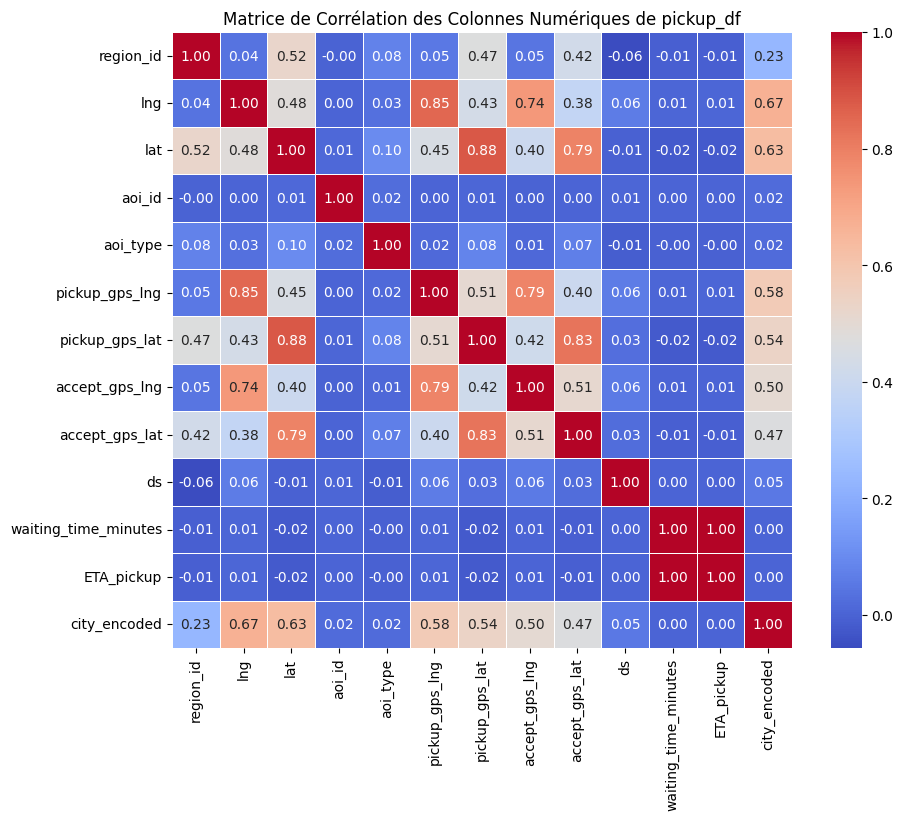

                      region_id       lng       lat    aoi_id  aoi_type  \
region_id              1.000000  0.040199  0.521722 -0.000820  0.076477   
lng                    0.040199  1.000000  0.483744  0.002687  0.030234   
lat                    0.521722  0.483744  1.000000  0.013304  0.100388   
aoi_id                -0.000820  0.002687  0.013304  1.000000  0.022694   
aoi_type               0.076477  0.030234  0.100388  0.022694  1.000000   
pickup_gps_lng         0.054081  0.851962  0.447083  0.002840  0.016358   
pickup_gps_lat         0.468225  0.431036  0.883549  0.007360  0.082770   
accept_gps_lng         0.045933  0.737453  0.401992  0.000751  0.010762   
accept_gps_lat         0.423182  0.375393  0.789538  0.004500  0.070603   
ds                    -0.056461  0.060739 -0.005581  0.006418 -0.014033   
waiting_time_minutes  -0.007812  0.008280 -0.021416  0.001696 -0.003583   
ETA_pickup            -0.007812  0.008280 -0.021416  0.001696 -0.003583   
city_encoded           0.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Use a heatmap to visualize the correlation structure among all numerical features
numeric_columns = pickup_df.select_dtypes(include=['float64', 'int64']).columns

# Calculer et afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))  # Ajuster la taille de la figure
sns.heatmap(pickup_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Colonnes Numériques de pickup_df')
plt.show()
corr_matrix = pickup_df[numeric_columns].corr()

# Afficher la matrice de corrélation
print(corr_matrix)


In [9]:
# Afficher les types de données pour chaque colonne
print(pickup_df.dtypes)


region_id                 int64
city                      int64
accept_time              object
time_window_start        object
time_window_end          object
lng                     float64
lat                     float64
aoi_id                    int64
aoi_type                  int64
pickup_time              object
pickup_gps_time          object
pickup_gps_lng          float64
pickup_gps_lat          float64
accept_gps_time          object
accept_gps_lng          float64
accept_gps_lat          float64
ds                        int64
waiting_time_minutes    float64
ETA_pickup              float64
city_encoded              int64
dtype: object


In [19]:

# Sample a smaller dataset
pickup_sampled = pickup_df.sample(n=5000, random_state=42)
# Selecting numerical columns
numeric_features = pickup_sampled.select_dtypes(include=['int64', 'float64']).drop(columns=['ETA_pickup'])
# Define target variable
y = pickup_sampled['ETA_pickup']
X = pickup_sampled.drop(columns=['ETA_pickup'])

In [12]:
from sklearn.model_selection import train_test_split
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

region_id                    int64
city                         int64
time_window_start           object
time_window_end             object
lng                        float64
lat                        float64
aoi_id                       int64
aoi_type                     int64
pickup_gps_lng             float64
pickup_gps_lat             float64
accept_gps_lng             float64
accept_gps_lat             float64
ds                           int64
waiting_time_minutes       float64
city_encoded                 int64
accept_time_seconds          int32
pickup_time_seconds          int32
accept_gps_time_seconds      int32
pickup_gps_time_seconds      int32
dtype: object
                    feature  importance
11     waiting_time_minutes    0.356409
4                    aoi_id    0.069900
9            accept_gps_lat    0.056168
3                       lat    0.055116
7            pickup_gps_lat    0.047808
6            pickup_gps_lng    0.047796
2                       lng    0.047476
1

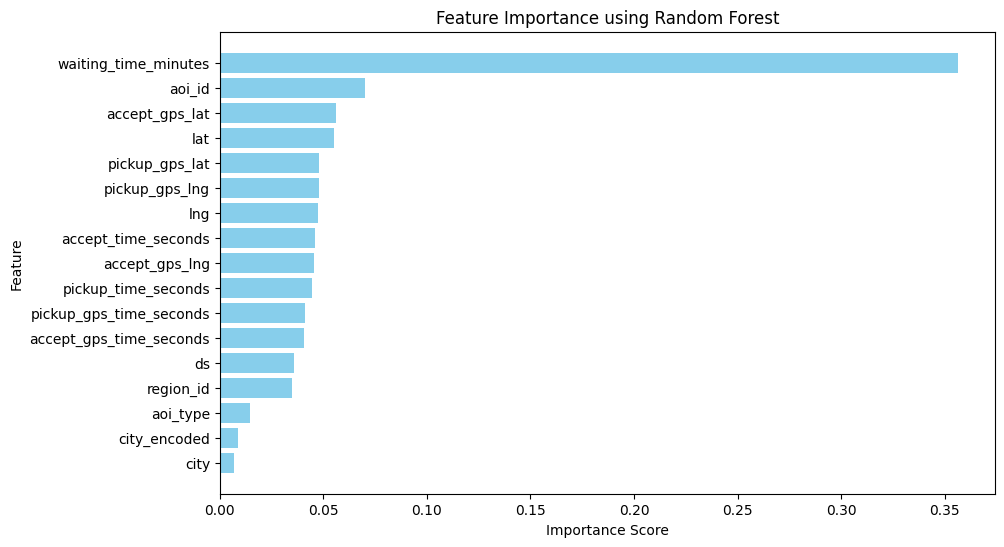

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import gc

# --- Étape 1 : Gestion propre des dates ---
date_cols = ['accept_time', 'pickup_time', 'accept_gps_time', 'pickup_gps_time']

# Conversion en datetime + gestion des NaT
for col in date_cols:
    pickup_sampled[col] = pd.to_datetime(pickup_sampled[col], errors='coerce')

# Suppression des lignes avec dates invalides (ou remplissage par une valeur par défaut)
pickup_sampled = pickup_sampled.dropna(subset=date_cols).copy()  # .copy() évite les SettingWithCopyWarning

# Conversion en secondes depuis epoch (en int32)
epoch = pd.Timestamp('1970-01-01')
pickup_sampled['accept_time_seconds'] = ((pickup_sampled['accept_time'] - epoch) // pd.Timedelta('1s')).astype('int32')
pickup_sampled['pickup_time_seconds'] = ((pickup_sampled['pickup_time'] - epoch) // pd.Timedelta('1s')).astype('int32')
pickup_sampled['accept_gps_time_seconds'] = ((pickup_sampled['accept_gps_time'] - epoch) // pd.Timedelta('1s')).astype('int32')
pickup_sampled['pickup_gps_time_seconds'] = ((pickup_sampled['pickup_gps_time'] - epoch) // pd.Timedelta('1s')).astype('int32')

# --- Étape 2 : Préparation des features ---
# Suppression des colonnes non numériques et des dates originales
X = pickup_sampled.drop(columns=['ETA_pickup'] + date_cols)

# Vérification des types (toutes les colonnes doivent être numériques)
print(X.dtypes)

cols_to_drop = ['ETA_pickup', 'time_window_start', 'time_window_end'] + date_cols
X = pickup_sampled.drop(columns=cols_to_drop)

# Target
y = pickup_sampled['ETA_pickup']

# --- Étape 3 : Entraînement du modèle ---
gc.collect()  # Nettoyage mémoire

rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

# --- Étape 4 : Analyse des résultats ---
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df)

# Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [22]:

pickup_df.columns

Index(['region_id', 'city', 'accept_time', 'time_window_start',
       'time_window_end', 'lng', 'lat', 'aoi_id', 'aoi_type', 'pickup_time',
       'pickup_gps_time', 'pickup_gps_lng', 'pickup_gps_lat',
       'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat', 'ds',
       'waiting_time_minutes', 'ETA_pickup', 'city_encoded'],
      dtype='object')

In [23]:

# Define features to remove based on importance scores
low_importance_features = ['region_id', 'city', 'aoi_type']

# Drop the low-importance features
pickup_df_cleaned=pickup_df.drop(columns=low_importance_features)

In [24]:

print("Removed Features:", low_importance_features)
print("Updated Dataset Shape:", pickup_df_cleaned.shape)

Removed Features: ['region_id', 'city', 'aoi_type']
Updated Dataset Shape: (6136147, 17)


In [28]:
# 1. Vérifiez d'abord le type de la colonne 'pickup_time'
print("Type de pickup_time:", pickup_df_cleaned['pickup_time'].dtype)

# 2. Convertir en datetime si ce n'est pas déjà fait
pickup_df_cleaned['pickup_time'] = pd.to_datetime(pickup_df_cleaned['pickup_time'], errors='coerce')

# 3. Vérifiez les valeurs manquantes après conversion
print("Valeurs manquantes après conversion:", pickup_df_cleaned['pickup_time'].isna().sum())

# 4. Créez la colonne pickup_hour seulement pour les lignes valides
pickup_df_cleaned['pickup_hour'] = pickup_df_cleaned['pickup_time'].dt.hour

# 5. Remplissez les valeurs manquantes si nécessaire (optionnel)
# pickup_df_cleaned['pickup_hour'] = pickup_df_cleaned['pickup_hour'].fillna(0)  # Par exemple, remplacer par 0

# 6. Créez vos nouvelles features
pickup_df_cleaned['location_sum'] = pickup_df_cleaned['lng'] + pickup_df_cleaned['lat']
pickup_df_cleaned['time_difference'] = pickup_df_cleaned['pickup_hour'] - pickup_df_cleaned['ETA_pickup']
pickup_df_cleaned['ETA_ratio'] = pickup_df_cleaned['ETA_pickup'] / (pickup_df_cleaned['pickup_hour'] + 1)
# 7. Affichez le résultat
print("Nouvelles features créées avec succès!")
print("Colonnes disponibles:", pickup_df_cleaned.columns.tolist())

Type de pickup_time: datetime64[ns]
Valeurs manquantes après conversion: 0
Nouvelles features créées avec succès!
Colonnes disponibles: ['accept_time', 'time_window_start', 'time_window_end', 'lng', 'lat', 'aoi_id', 'pickup_time', 'pickup_gps_time', 'pickup_gps_lng', 'pickup_gps_lat', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat', 'ds', 'waiting_time_minutes', 'ETA_pickup', 'city_encoded', 'location_sum', 'pickup_hour', 'time_difference', 'ETA_ratio']


In [29]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to standardize
numeric_cols = ['pickup_hour', 'ETA_pickup','ETA_ratio', 'lng','location_sum','time_difference', 'lat']


# Apply Standardization (Z-Score Scaling)
standard_scaler = StandardScaler()
pickup_df_cleaned[numeric_cols] = standard_scaler.fit_transform(pickup_df_cleaned[numeric_cols])

# Display updated dataset
print("Standardized Features:", numeric_cols)
print("Updated Dataset Shape:", pickup_df_cleaned.shape)

Standardized Features: ['pickup_hour', 'ETA_pickup', 'ETA_ratio', 'lng', 'location_sum', 'time_difference', 'lat']
Updated Dataset Shape: (6136147, 21)


In [30]:
from sklearn.decomposition import PCA

# Define the number of principal components (adjust based on explained variance)
num_components = 4  # i can tune this based on variance retention

# Apply PCA on numerical features
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(pickup_df_cleaned.select_dtypes(include=['float64', 'int64']))

# Convert principal components to DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

# Display explained variance ratio
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Updated Dataset Shape:", pca_df.shape)

Explained Variance Ratios: [9.96030684e-01 3.42771000e-03 5.40303684e-04 9.02576669e-07]
Updated Dataset Shape: (6136147, 4)


In [31]:

pca_df.head()

,PC1,PC2,PC3,PC4
0,-12111.790956,-103.431148,-70.429408,1.983551
1,-12111.789113,-104.418128,-57.424936,3.087395
2,-12111.743927,361.576417,-66.883136,3.086082
3,-12111.800893,-204.430310,-69.326876,3.115403
4,-12111.788012,-72.431611,-71.456303,3.111215


In [37]:
import pandas as pd
from google.colab import drive

# 1. Monter le Google Drive
drive.mount('/content/drive')
output_path = '/content/drive/MyDrive/task2 (1)/pickup_with_feature.csv'
pickup_df.to_csv(output_path, index=False)
# 2. Vérifier le chemin exact
try:
    # Essayer de charger le fichier
    pickup_df = pd.read_csv('/content/drive/MyDrive/task2 (1)/pickup_with_feature.csv')

    # 3. Enregistrer le nouveau fichier
    output_path = '/content/drive/MyDrive/task2 (1)/pickup_with_new_features.csv'
    pickup_df.to_csv(output_path, index=False)

    print(f"Fichier enregistré avec succès à : {output_path}")

except FileNotFoundError:
    print("\nErreur : Fichier introuvable. Veuillez vérifier :")
    print("1. Que vous avez bien monté votre Google Drive")
    print("2. Que le chemin est exact (attention aux espaces et majuscules)")
    print("3. Que le fichier existe bien à cet emplacement")

    # Lister les fichiers disponibles pour aider au diagnostic
    import os
    print("\nContenu du dossier :")
    print(os.listdir('/content/drive/MyDrive/task2 (1)'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fichier enregistré avec succès à : /content/drive/MyDrive/task2 (1)/pickup_with_new_features.csv
